## Итоговая работа

In [57]:
import random
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg
from sympy import *
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA
from scipy.optimize import minimize
%matplotlib inline

### Задание 1
Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))


In [58]:

raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [59]:
# Создание словаря для сравнения пар пользователей
pairs = {}

# Счетчик строк пользователей
i = 0
j = 0

In [60]:
# Сравнение пар пользователей

for x in raitings:
    for y in raitings:
        pair = tuple(sorted([i, j]))
        if i != j:                        # Исключение сравнения пользователя с самим собой
            x_lenght = np.linalg.norm(x)  # Расчет длины вектора
            y_lenght = np.linalg.norm(y)
            cos_ = np.dot(x,y) / (x_lenght * y_lenght)   # Вычисление косинуса угла между векторами
            pairs[pair] = cos_
            j += 1
    j = 0
    i +=1       

In [61]:
# Сортировка словаря по значениям по убыванию
pairs_sorted = sorted(pairs, key = lambda k: pairs[k])

In [62]:
# 10 пар наиболее похожих между собой пользователей
[print(raitings[x[0]], raitings[x[1]], sep = ', ') for x in pairs_sorted[:10]]

[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6], [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2]
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7], [ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6]
[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6], [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2]
[ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1], [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2]
[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6], [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
[ 1  6  8  8  4  9  3  8 10  5  2  6  8  1  6], [ 4  1  6  4  3 10  4  4  2  8  7  9  3  8  3]
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6], [ 8  3  7  3  8  6  1  8  8  6  1  9  4 10  1]
[6 1 9 7 7 9 2 3 5 1 6 6 3 2 7], [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]
[ 3  7  3  5  7  9  9  6  2  9  1  2  8 10  6], [ 9  8  4  8  8 10  6  1  1  2  9  5  2  7  2]
[ 4  4  9  4  1  6 10  7  9  6  9  2  8  6  6], [6 1 9 7 7 9 2 3 5 1 6 6 3 2 7]


[None, None, None, None, None, None, None, None, None, None]

b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [63]:
# Создание экземпляра PCA
pca = PCA(n_components = 5)

# Снижение размерности данных
raitings_transformed = pca.fit_transform(raitings)


In [64]:
# Доля от общей дисперсии по каждому компоненту
explained_variance = pca.explained_variance_ratio_

In [65]:
# Общая доля от общей дисперсии
np.sum(explained_variance)

0.8343544281843047

Вывод:

При сжатии массива до 5 признаков сохранятется 83% информации.

### Задание 2
Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [66]:
# Создание символьной переменной
x = symbols('x')

# Описание переменной
func = tan(sin(x)+cos(2*x+3))**2

# Вычисление первой производной в т. x0 = 1
diff(func, x).evalf(6, subs = {x: 1})

55.3859

### Задание 3
Дана функция с неизвестными параметрами a и b, также известны значения функции fx в точках x. Найти оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [67]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [68]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [69]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

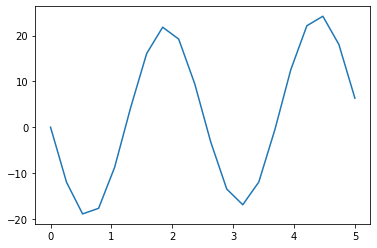

In [70]:
plt.plot(x, fx)
plt.show()

In [71]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [72]:
# Начальная точка
x0 = np.array([0, 0])

In [73]:
# Функция минимизации
res = minimize(error, x0, method = 'COBYLA')

In [74]:
# Значение параметров a и b, минимизирующих абсолютную ошибку
res.x

array([ 3.00018796, -2.50008926])

### Задание 4
Создать собственную дискретную случайную величину с 20 значениями. Сгенерировать 1000 выборок размера 50. Посчитать среднее для каждой выборки. Построить гистограмму распределения средних.

In [75]:
# Задание начального условия для генератора случайных чисел
np.random.seed(42)

# Генерация дискретной случайной величины
seq = random.sample(range(30), 20)

In [76]:
# Генерация 1000 выборок размером 50
samples = np.random.choice(seq, size = (1000, 50))

In [77]:
# Расчет средних значений каждой выборки
samp_mean = [np.mean(sample) for sample in samples]

Text(0, 0.5, 'frequency')

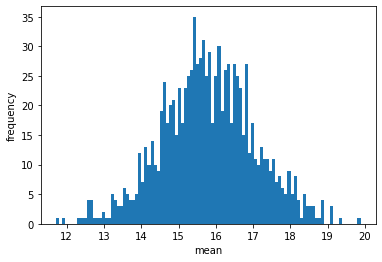

In [78]:
# Гистограмма распрелеления средних значений

plt.hist(samp_mean, 100)
plt.xlabel('mean')
plt.ylabel('frequency')

### Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [79]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [80]:
# Собственные значения и вектора матрицы m
w,v = np.linalg.eig(m)

In [81]:
print('Сосбственные значения матрицы m:', w)
print('Сосбственные вектора матрицы m:')
print(v)

Сосбственные значения матрицы m: [ 3. -1.]
Сосбственные вектора матрицы m:
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
